In [6]:
!unzip '/content/cust.zip'

unzip:  cannot find or open /content/cust.zip, /content/cust.zip.zip or /content/cust.zip.ZIP.


In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv(r'/content/marketing_campaign.csv',sep="\t")

In [11]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
print(f'Total Number of datapoints: {len(data)}')
print(f'Shape of the dataset: {data.shape}')

Total Number of datapoints: 2240
Shape of the dataset: (2240, 29)


In [13]:
print('Quick view at the dataset:')

data.head(10).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Quick view at the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [14]:
print('Information about the dataset:')

data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

In [15]:
print('Summary of the dataset:')

data.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Summary of the dataset:


,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [16]:
print('Null values in the dataset:')

data.isna().sum().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})


Null values in the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
data.dropna(inplace=True)
print('Total number of datapoints after removing radata.dropna(inplace=True')
print('Total number of datapoints after removing raws with missing values, len(data)ws with missing values', len(data))

Total number of datapoints after removing radata.dropna(inplace=True
Total number of datapoints after removing raws with missing values, len(data)ws with missing values 2212


In [56]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

In [27]:
print('Marital Status:')

data.Marital_Status.value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Marital Status:


,Married,Together,Single,Divorced,Widow,Alone,Absurd,YOLO
Marital_Status,864,580,480,232,77,3,2,2


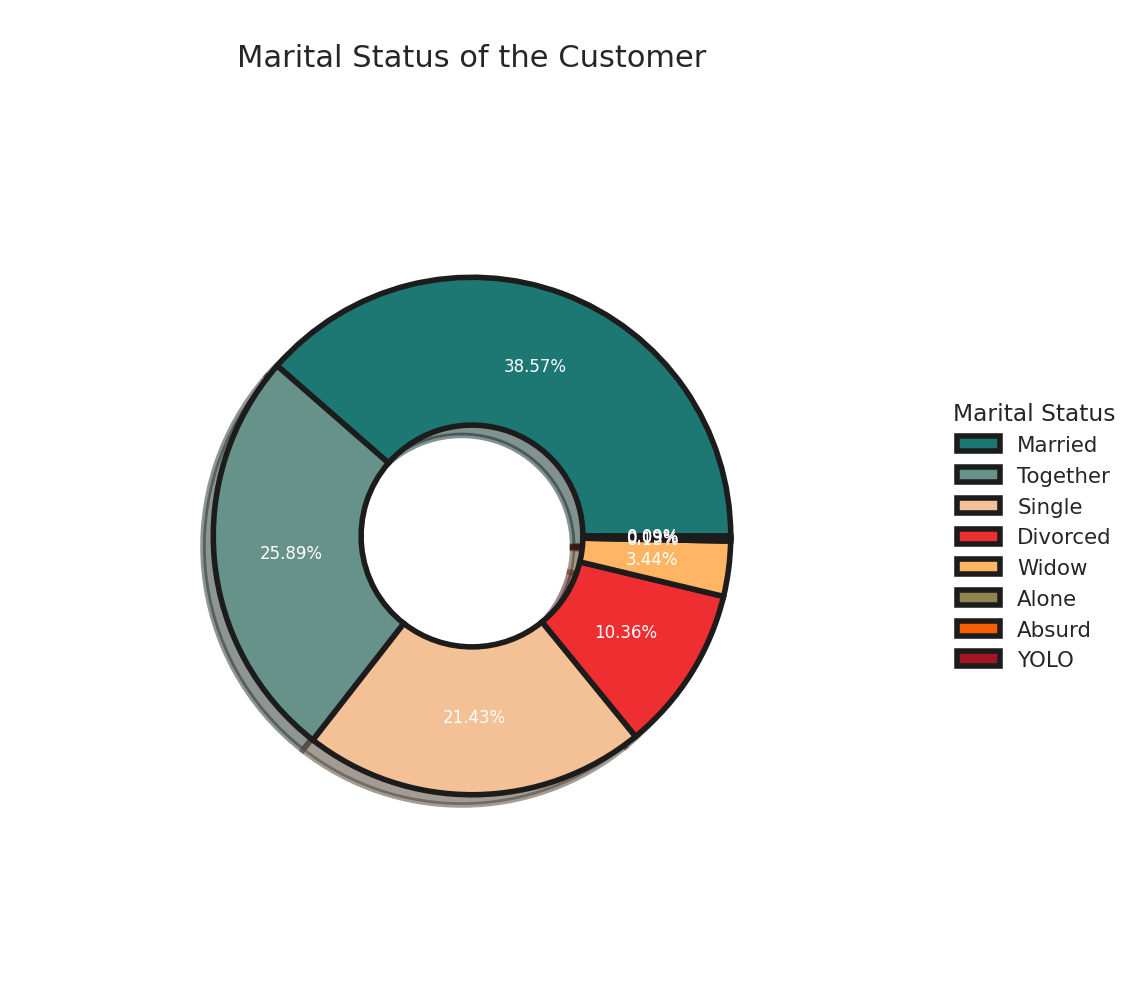

In [28]:
plt.subplots(figsize=(12, 12))

labels = 'Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'
size = 0.4

wedges, texts, autotexts = plt.pie([len(data[data['Marital_Status'] == 'Married']),
                                   len(data[data['Marital_Status'] == 'Together']),
                                   len(data[data['Marital_Status'] == 'Single']),
                                   len(data[data['Marital_Status'] == 'Divorced']),len(data[data['Marital_Status'] == 'Widow']),
                                   len(data[data['Marital_Status'] == 'Alone']),
                                   len(data[data['Marital_Status'] == 'Absurd']),
                                   len(data[data['Marital_Status'] == 'YOLO'])],
                                  explode=(0,0,0,0,0,0,0,0),
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=palette,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, labels, title='Marital Status', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nMarital Status of the Customer', fontsize=22)
plt.show()

In [29]:
print('Education:')

data.Education.value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})


Education:


,Graduation,PhD,Master,2n Cycle,Basic
Education,1127,486,370,203,54


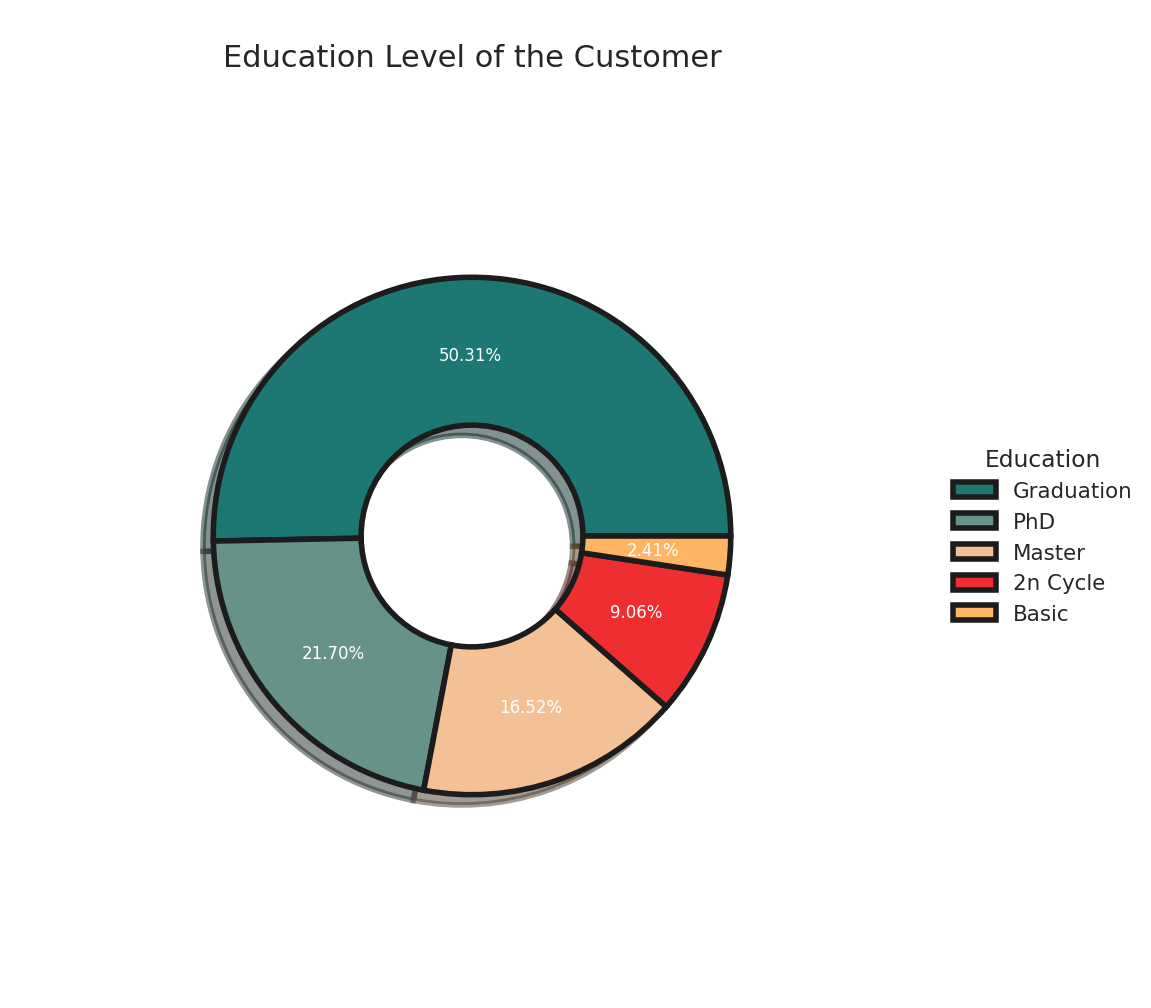

In [30]:
plt.subplots(figsize=(12, 12))

labels = 'Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'
size = 0.4

wedges, texts, autotexts = plt.pie([len(data[data['Education'] == 'Graduation']),
                                   len(data[data['Education'] == 'PhD']),
                                   len(data[data['Education'] == 'Master']),
                                   len(data[data['Education'] == '2n Cycle']),
                                   len(data[data['Education'] == 'Basic'])],
                                  explode=(0,0,0,0,0),
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,colors=palette,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, labels, title='Education', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nEducation Level of the Customer', fontsize=22)
plt.show()

In [31]:
data['Age']=2023-data['Year_Birth']

# Total spendings on different items
data['Spent']=data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Deriving Living attributes based on the marital status
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone',
                                                'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

# Feature indicating Total childern in the household
data['Children']=data['Kidhome'] + data['Teenhome']

# Feature indicating Family size
data['Family_Size']=data['Living_With'].replace({'Partner':2,'Alone':1}) + data['Children']

# Renaming Education Categories for better understanding
data['Education']=data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate'})


# Renaming features for clearn understanding
data=data.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish',
                          'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
to_drop=['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID']

data.drop(to_drop,inplace=True,axis=1)


In [32]:
data.head(20).style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size
0,Graduation,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,1617,Alone,0,1
1,Graduation,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,27,Alone,2,3
2,Graduation,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,776,Partner,0,2
3,Graduation,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,53,Partner,1,3
4,PhD,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,422,Partner,1,3
5,Master,62513.000000,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,56,716,Partner,1,3
6,Graduation,55635.000000,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,52,590,Alone,1,2
7,PhD,33454.000000,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,38,169,Partner,1,3
8,PhD,30351.000000,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,49,46,Partner,1,3
9,PhD,5648.000000,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,73,49,Partner,2,4


In [33]:
data.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
Wines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
Fruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
Meat,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
Fish,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000
Sweets,2240.000000,27.062946,41.280498,0.000000,1.000000,8.000000,33.000000,263.000000
Gold,2240.000000,44.021875,52.167439,0.000000,9.000000,24.000000,56.000000,362.000000


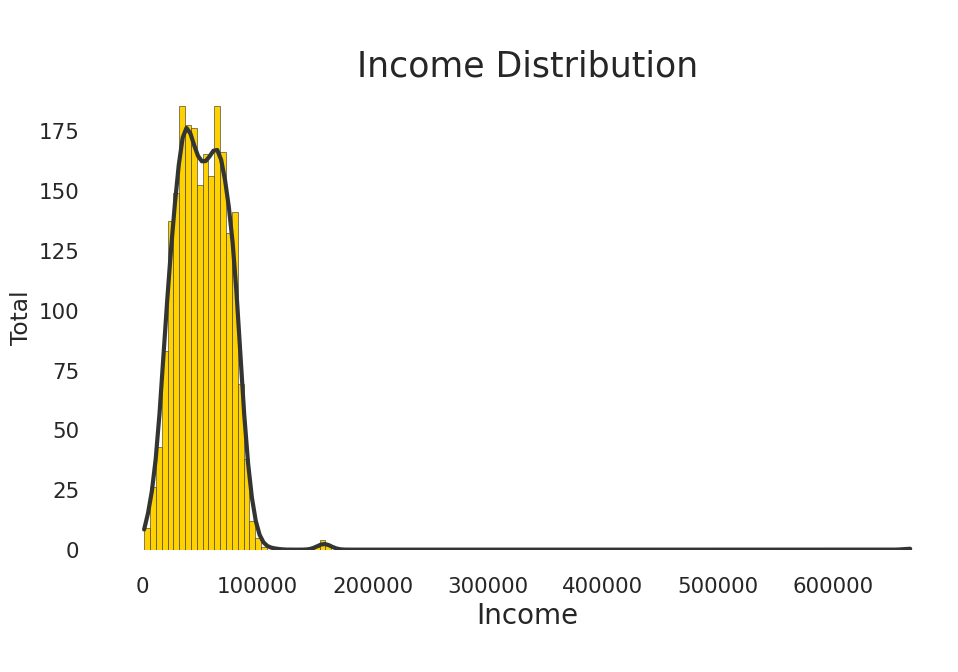

In [34]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Income'], color=palette[11], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

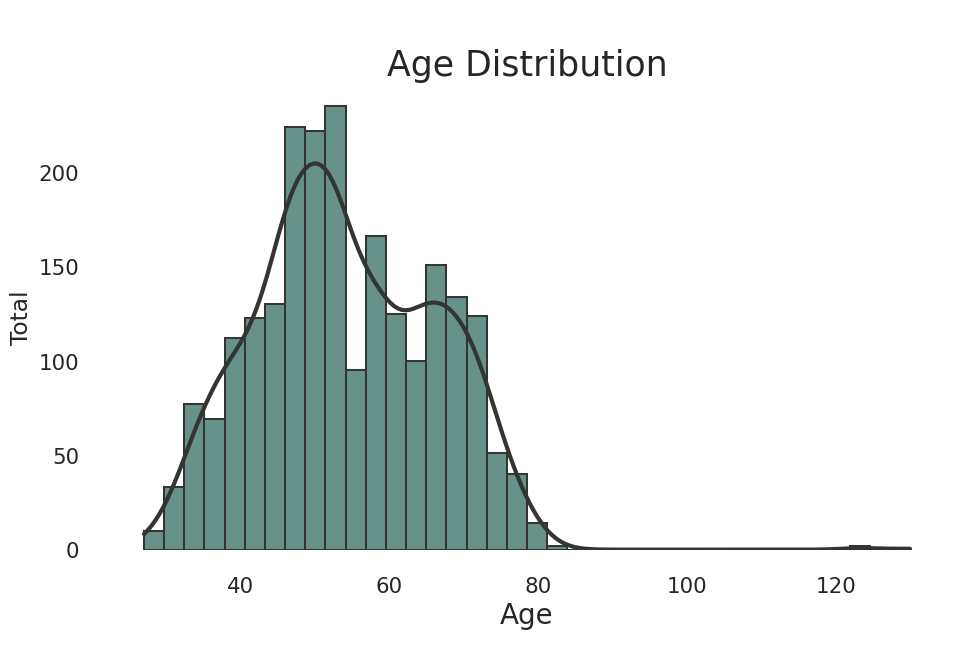

In [35]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Age'], color=palette[1], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nAge Distribution', fontsize=25)
ax.set_xlabel('Age\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

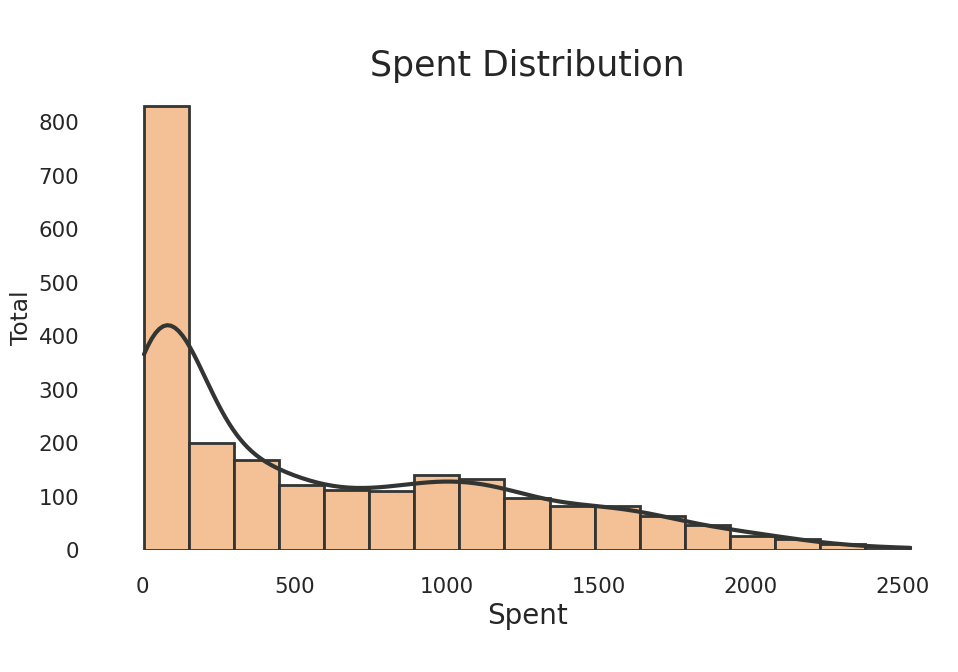

In [36]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Spent'], color=palette[2], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nSpent Distribution', fontsize=25)
ax.set_xlabel('Spent\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

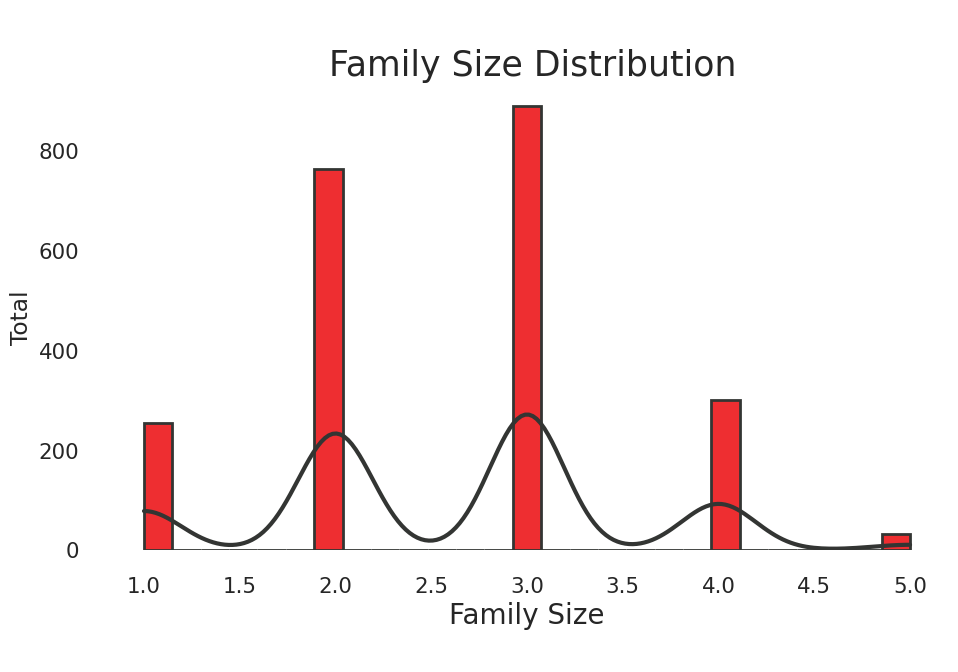

In [37]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data['Family_Size'], color=palette[3], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\n Family Size Distribution', fontsize=25)
ax.set_xlabel('Family Size\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()


In [38]:
data=data[(data['Age']<90)]
data=data[(data['Income']<300000)]

print('The total number of data points after dropping outliers:', len(data))

The total number of data points after dropping outliers: 2212


<Axes: >

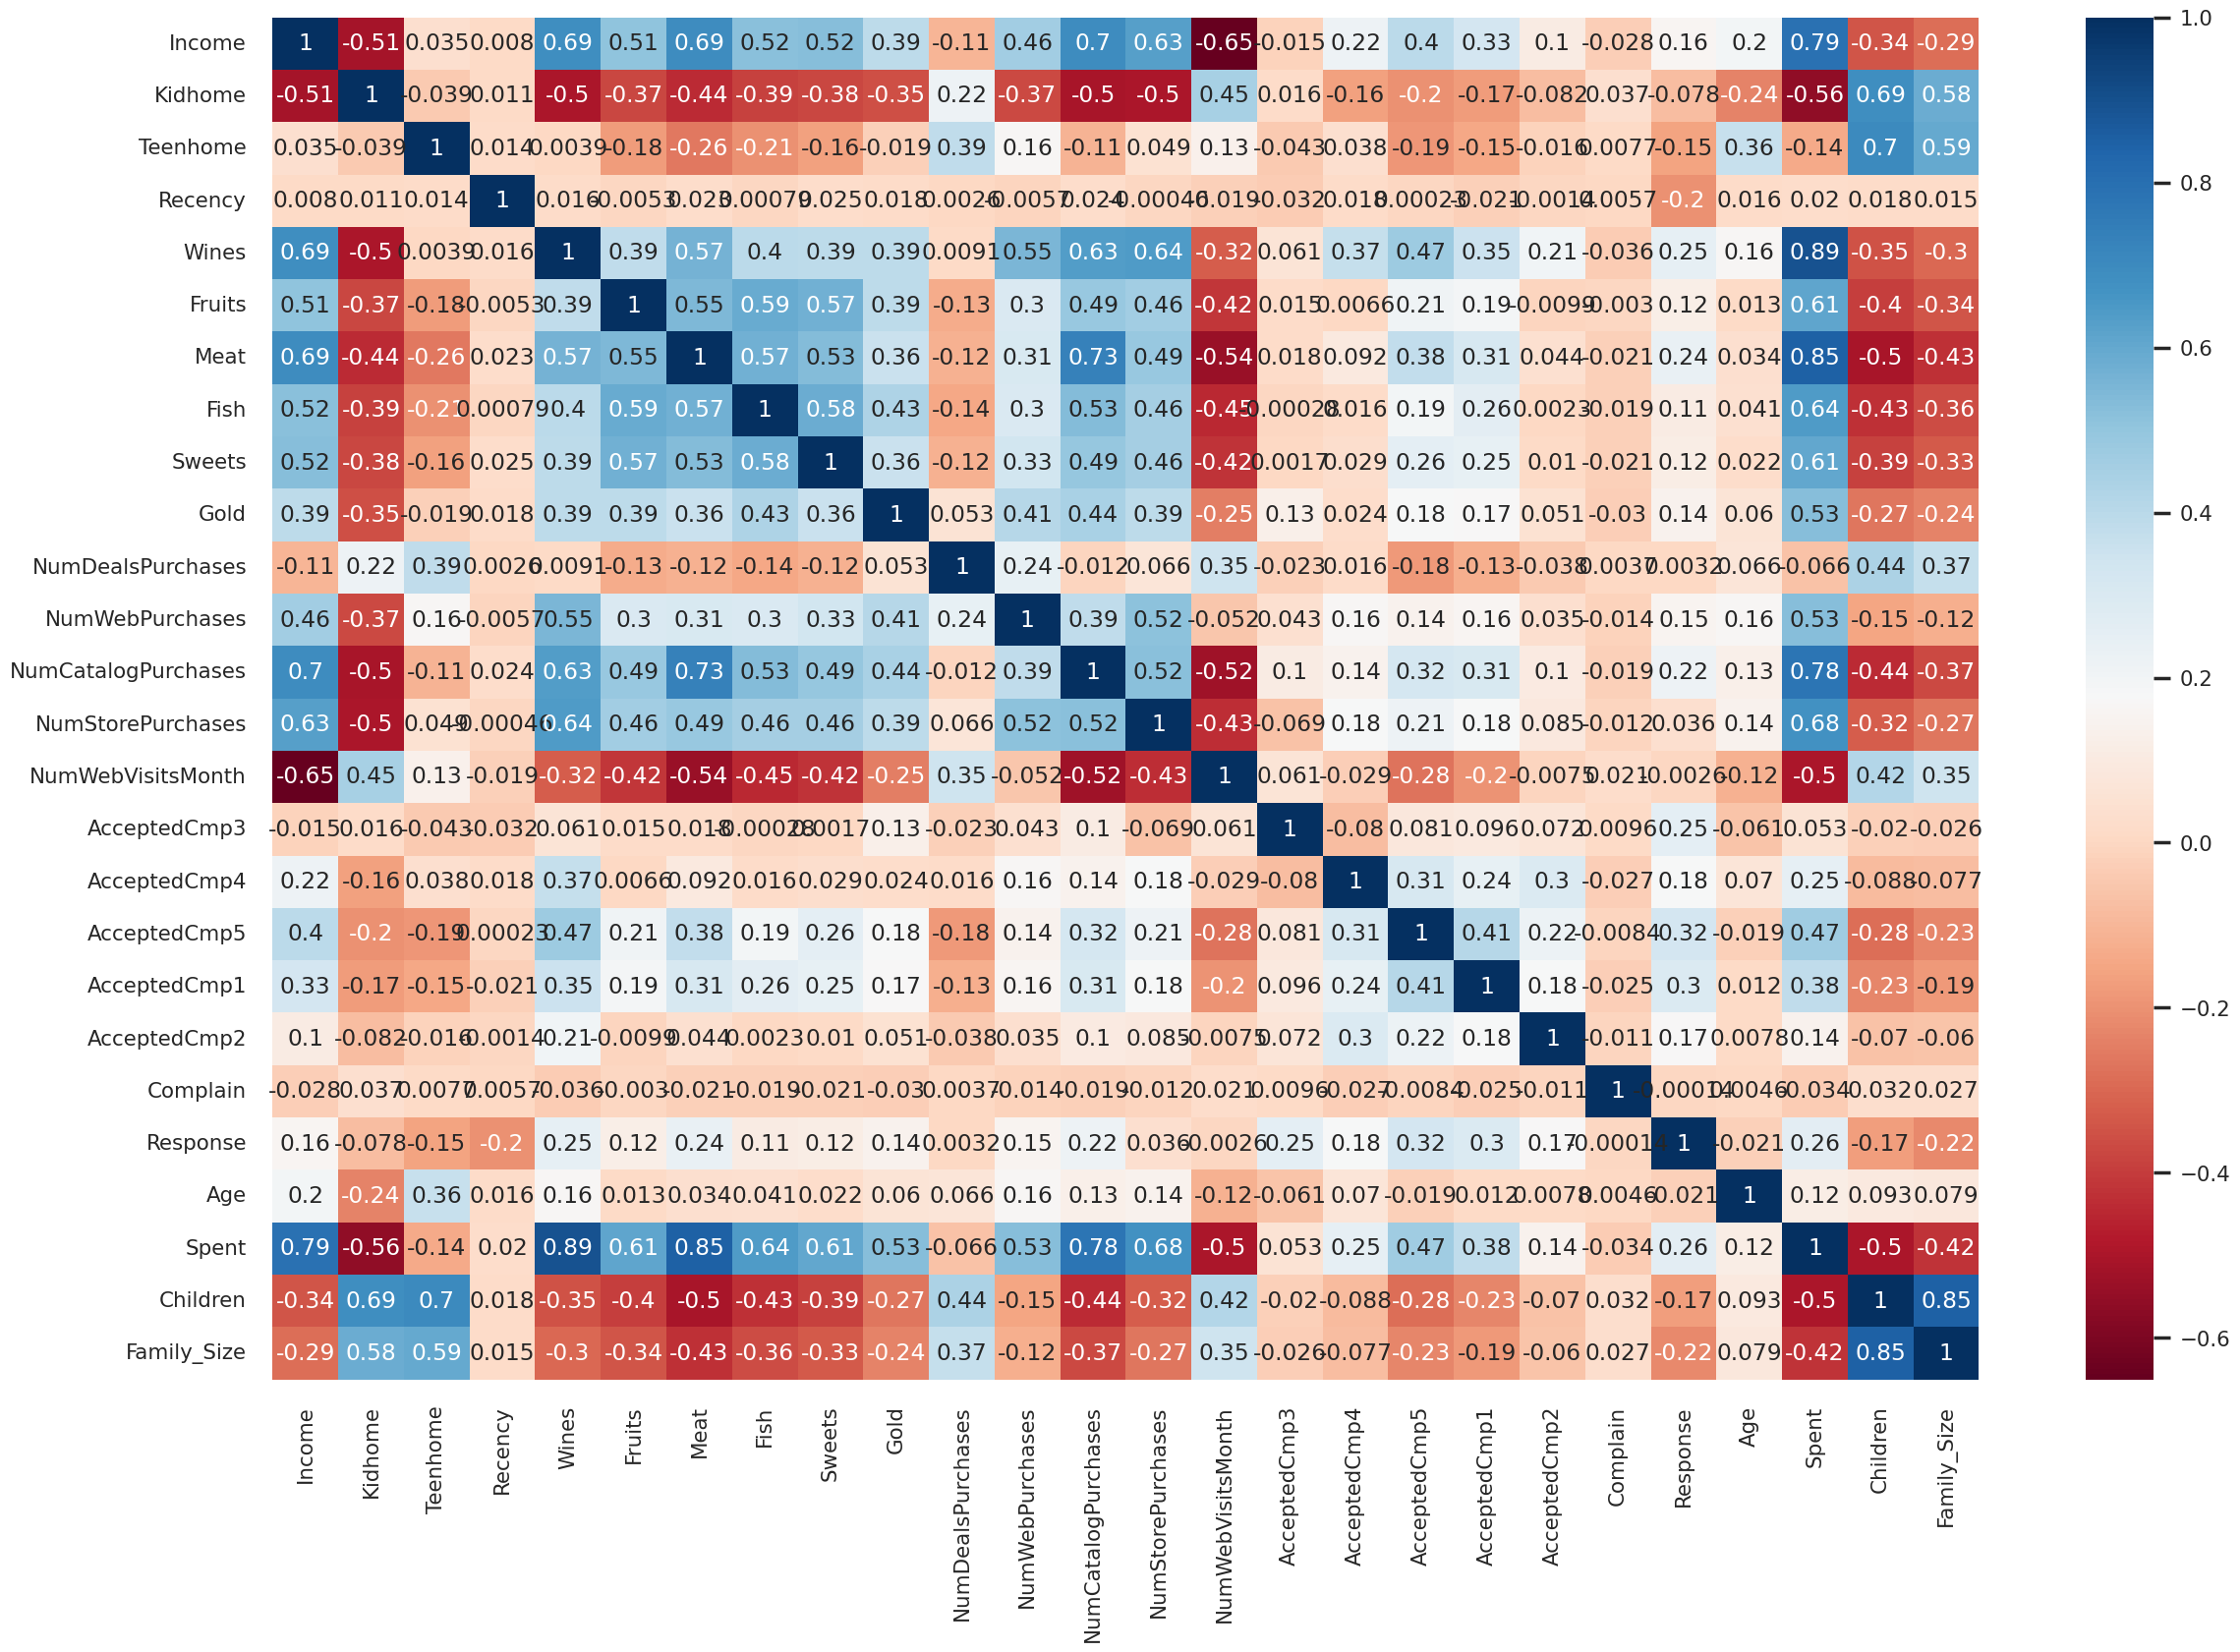

In [39]:
cormat=data.corr()
plt.figure(figsize=(28,18))
sns.heatmap(cormat, annot=True,cmap='RdBu')

In [40]:
cat_cols=[col for col in data.columns if data[col].dtypes=='object']

print('Categorical features in dataset are:', cat_cols)

Categorical features in dataset are: ['Education', 'Living_With']


In [41]:
label_encoder=LabelEncoder()
for col in cat_cols:
    data[col]=data[[col]].apply(label_encoder.fit_transform)

print('Categorical features are converted into Numerical features succussfully!')

Categorical features are converted into Numerical features succussfully!


In [42]:
ds=data.copy()

# We Will be removing following feature from the copied dataset
cols_to_drop=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds.drop(cols_to_drop, axis=1, inplace=True)

In [43]:
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print('All features are now scaled!')

All features are now scaled!


In [44]:
print('Dataset to be used for model building:')

scaled_ds.head().style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

Dataset to be used for model building:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,-0.868542,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.868542,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.868542,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.868542,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,0.977892,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070


In [45]:
pca=PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds=pd.DataFrame(pca.transform(scaled_ds), columns=(['col1', 'col2', 'col3']))

In [46]:
pca_ds.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
col1,2212.000000,0.000000,2.798058,-5.873692,-2.488744,-0.746653,2.415454,7.269832
col2,2212.000000,0.000000,1.624389,-3.816157,-1.317109,-0.141621,1.161477,6.296695
col3,2212.000000,-0.000000,1.154644,-3.064278,-0.892816,-0.099323,0.791113,3.729488


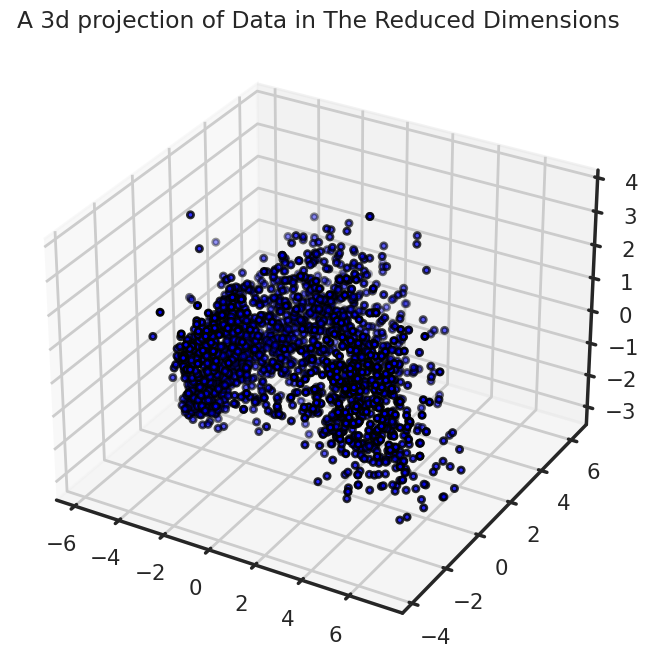

In [47]:
a=pca_ds['col1']
b=pca_ds['col2']
c=pca_ds['col3']


#plot
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(a,b,c, c='blue', marker='o', edgecolor='black')
ax.set_title('A 3d projection of Data in The Reduced Dimensions')
plt.show()

Elbow method to determine number of clusters to be made:


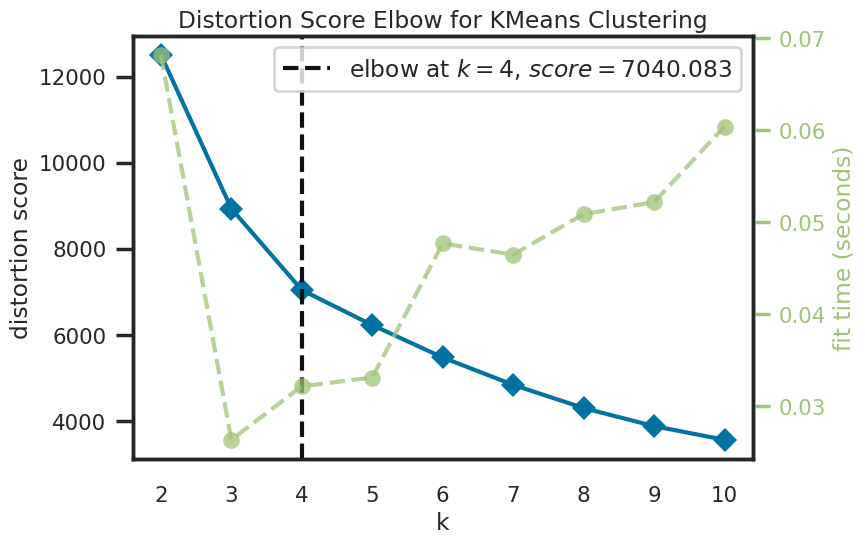

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
print('Elbow method to determine number of clusters to be made:')
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(pca_ds)
elbow.show()

In [49]:
AC=AgglomerativeClustering(n_clusters=4)

# Fitting the model and predicting clusters
yhat_AC=AC.fit_predict(pca_ds)
pca_ds['Clusters']=yhat_AC

# Adding the Clusters attribute to the original dataset
data['Clusters']=yhat_AC

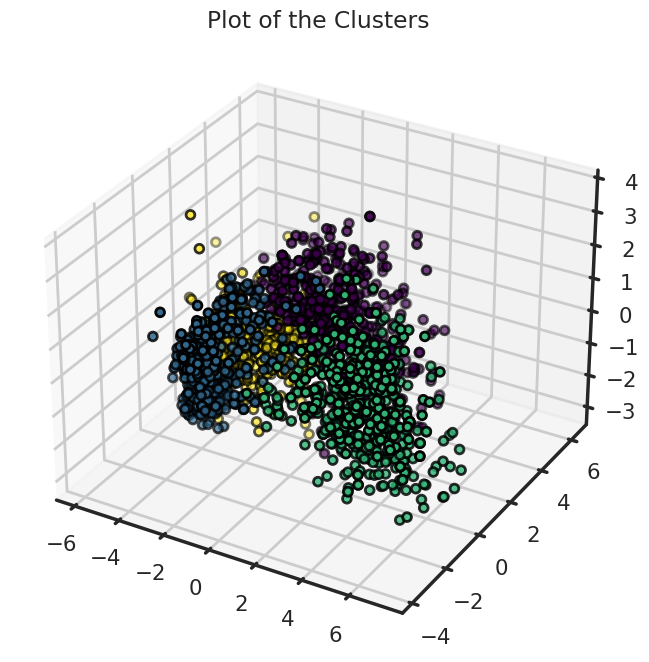

In [50]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot(111, projection='3d')
ax.scatter(a,b,c, s=40, c=pca_ds['Clusters'], marker='o', edgecolor='black', cmap='viridis')
ax.set_title('Plot of the Clusters')
plt.show()


In [51]:
data['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,1,0,3,2
Clusters,586,554,543,529


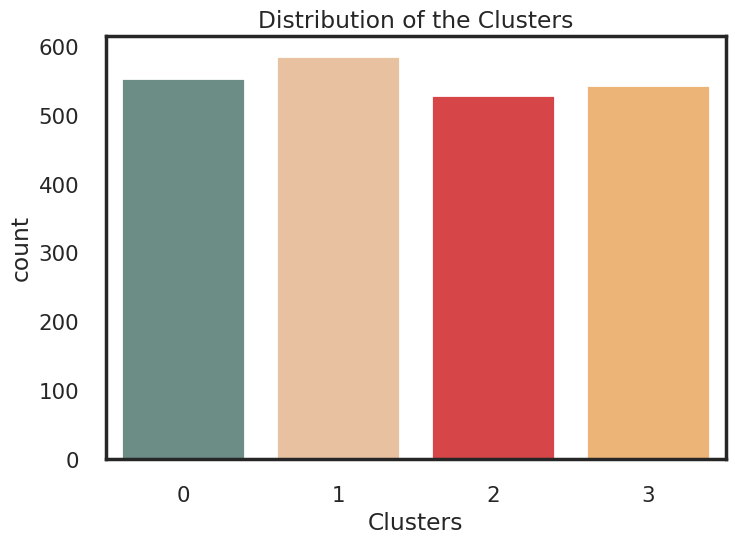

In [52]:
sns.countplot(x=data['Clusters'],palette=palette[1:5])
plt.title('Distribution of the Clusters')
plt.show()

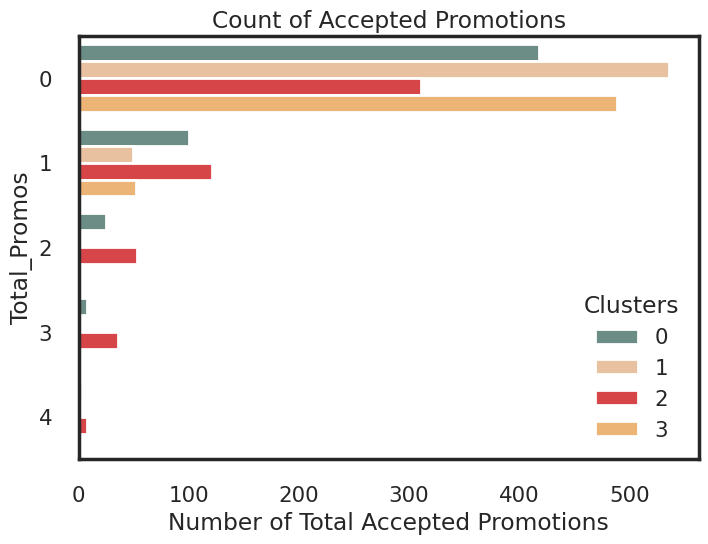

In [53]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

sns.countplot(data=data, y='Total_Promos', hue='Clusters', palette=palette[1:5])
plt.title('Count of Accepted Promotions')
plt.xlabel('Number of Total Accepted Promotions')
plt.show()


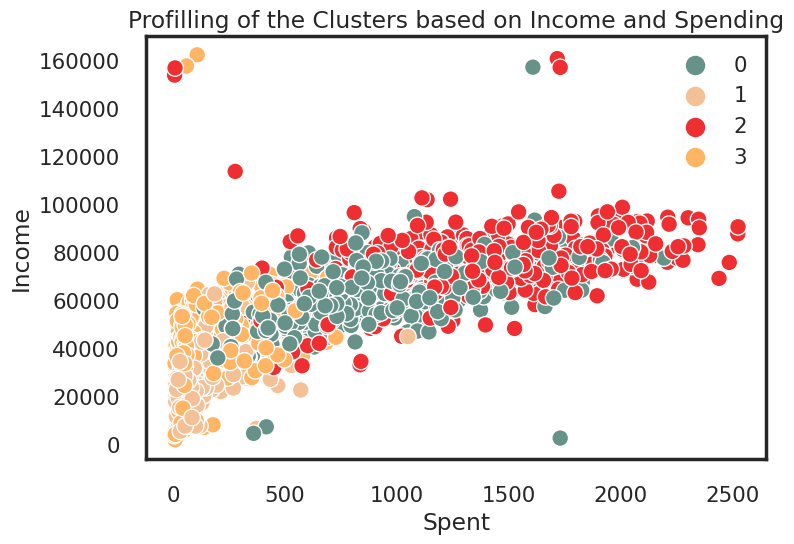

In [66]:
sns.scatterplot(data=data, x='Spent', y='Income', hue='Clusters', palette=palette[1:5])
plt.title('Profilling of the Clusters based on Income and Spending')
plt.legend()
plt.show()